<a href="https://colab.research.google.com/github/napoles-uach/ML-FCQ/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn import datasets

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [3]:
import numpy as np

In [4]:
diabetes = datasets.load_diabetes()

In [5]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [6]:
X_train_full,X_test,y_train_full,y_test = train_test_split(diabetes.data,diabetes.target,random_state=43)

In [7]:
#y_train_full[0]

In [8]:
#print(y_test[np.argmax(y_test)])
#print(y_train_full[np.argmax(y_train_full)])

In [9]:
y_max=346.0

In [10]:
#max_y=y_train_full[np.argmax(y_train_full)]
y_train_full=y_train_full/y_max
y_test = y_test /y_max

In [11]:
X_train,X_valid,y_train,y_valid = train_test_split(X_train_full,y_train_full,random_state=23)

In [12]:
print(X_train[0])

[ 0.01628068 -0.04464164  0.07355214 -0.04124694 -0.00432087 -0.01352667
 -0.01394774 -0.00111622  0.04289569  0.04448548]


array([ 0.01628068, -0.04464164,  0.07355214, -0.04124694, -0.00432087,
       -0.01352667, -0.01394774, -0.00111622,  0.04289569,  0.04448548])



In [13]:
X_train[0]

array([ 0.01628068, -0.04464164,  0.07355214, -0.04124694, -0.00432087,
       -0.01352667, -0.01394774, -0.00111622,  0.04289569,  0.04448548])

In [14]:
#scaler = StandardScaler()

In [15]:
#X_train = scaler.fit_transform(X_train)
#X_valid = scaler.transform(X_valid)
#X_test = scaler.transform(X_test)

In [16]:
#y_valid[np.argmax(y_valid)]

In [17]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
tensorflow.keras.utils.set_random_seed(
    45
)

In [19]:
l_p=0.01
neur=200
drop=0.1
model = keras.models.Sequential([
    keras.layers.Dense(neur,input_shape=X_train.shape[1:]),
    keras.layers.Dense(neur,activation='tanh',
                       kernel_initializer='he_normal',
                       kernel_regularizer=keras.regularizers.l2(l_p)
                       ),
    keras.layers.Dropout(rate=drop),
    keras.layers.Dense(neur,activation='elu',
                       kernel_initializer='he_normal',
                       kernel_regularizer=keras.regularizers.l2(l_p)
                       ),
    keras.layers.Dropout(rate=drop),
    keras.layers.Dense(neur,activation='elu',
                       kernel_initializer='he_normal',
                       kernel_regularizer=keras.regularizers.l2(l_p)
                       ),
    keras.layers.Dropout(rate=drop),
    keras.layers.Dense(1,)
])

In [20]:
#model.compile(loss='mean_squared_error',optimizer='sgd')
#model.compile(loss='mean_squared_error',optimizer='sgd',metrics=['accuracy'])
model.compile(optimizer='adam',loss='mean_absolute_error', metrics=['mean_absolute_error'])
#mean_absolute_error

In [21]:
history = model.fit(X_train,y_train,epochs=200,validation_data=(X_valid,y_valid))#,validation_data=(X_valid,y_valid))

Epoch 1/200
8/8 [==============================] - 3s 70ms/step - loss: 11.6038 - mean_absolute_error: 0.2724 - val_loss: 10.7219 - val_mean_absolute_error: 0.1912
Epoch 2/200
8/8 [==============================] - 0s 18ms/step - loss: 10.1357 - mean_absolute_error: 0.1481 - val_loss: 9.4099 - val_mean_absolute_error: 0.1393
Epoch 3/200
8/8 [==============================] - 0s 16ms/step - loss: 8.9216 - mean_absolute_error: 0.1433 - val_loss: 8.2597 - val_mean_absolute_error: 0.1274
Epoch 4/200
8/8 [==============================] - 0s 14ms/step - loss: 7.8294 - mean_absolute_error: 0.1363 - val_loss: 7.2420 - val_mean_absolute_error: 0.1230
Epoch 5/200
8/8 [==============================] - 0s 21ms/step - loss: 6.8653 - mean_absolute_error: 0.1340 - val_loss: 6.3479 - val_mean_absolute_error: 0.1245
Epoch 6/200
8/8 [==============================] - 0s 18ms/step - loss: 6.0103 - mean_absolute_error: 0.1305 - val_loss: 5.5590 - val_mean_absolute_error: 0.1267
Epoch 7/200
8/8 [========

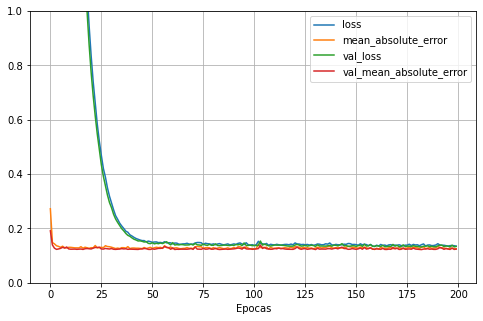

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.xlabel('Epocas')
plt.show()

In [23]:
mse_test = model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 4ms/step - loss: 0.1429 - mean_absolute_error: 0.1330


In [24]:
#X_new = X_test

In [25]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 4ms/step


Text(0, 0.5, 'y_pred')

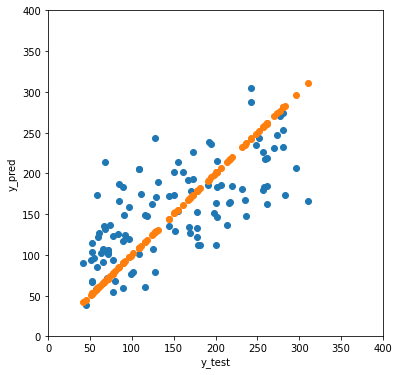

In [26]:
import matplotlib.pyplot as plt
plt.subplots(figsize=(6, 6))
plt.scatter(y_test*y_max,y_pred*y_max)
plt.scatter(y_test*y_max,y_test*y_max)
plt.xlim(0,400)
plt.ylim(0,400)
plt.xlabel('y_test')
plt.ylabel('y_pred')

In [27]:
chart_data = pd.DataFrame(
    y_pred,
    columns=["pred"])
chart_data2 = pd.DataFrame(
    y_test,
    columns=["pred"])

In [28]:
import plotly.express as px
fig = px.bar(chart_data, y='pred')
fig.show()

In [29]:
import plotly.express as px
data_canada = px.data.gapminder().query("country == 'Canada'")
fig = px.bar(chart_data2, y='pred')
fig.show()